

![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/PP_EXPLAIN_DOCUMENT.ipynb)




# **Do POS tagging and NER detection in different languages using pre-trained pipelines**

## 1. Colab Setup

In [ ]:
# Install PySpark and Spark NLP
! pip install -q pyspark==3.3.0 spark-nlp==4.2.8

## 2. Start the Spark session

Import dependencies and start Spark session.

In [2]:
import json
import pandas as pd
import numpy as np

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline

spark = sparknlp.start()

## 3. Select & load the pretrained pipeline

For complete pipeline list:

https://github.com/JohnSnowLabs/spark-nlp-models#public-pipelines

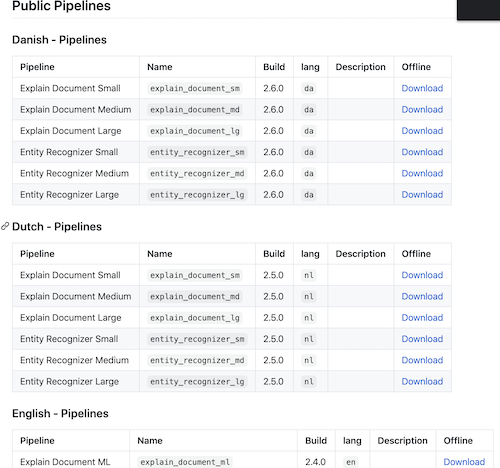

In [3]:
pipeline = PretrainedPipeline('explain_document_sm', lang='da')

explain_document_sm download started this may take some time.
Approx size to download 161.8 MB
[OK!]


## 4. Some sample examples

In [4]:
text_list = ["""William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, and philanthropist. He is best known as the co-founder of Microsoft Corporation. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014. He is one of the best-known entrepreneurs and pioneers of the microcomputer revolution of the 1970s and 1980s. Born and raised in Seattle, Washington, Gates co-founded Microsoft with childhood friend Paul Allen in 1975, in Albuquerque, New Mexico; it went on to become the world's largest personal computer software company. Gates led the company as chairman and CEO until stepping down as CEO in January 2000, but he remained chairman and became chief software architect. During the late 1990s, Gates had been criticized for his business tactics, which have been considered anti-competitive. This opinion has been upheld by numerous court rulings. In June 2006, Gates announced that he would be transitioning to a part-time role at Microsoft and full-time work at the Bill & Melinda Gates Foundation, the private charitable foundation that he and his wife, Melinda Gates, established in 2000.[9] He gradually transferred his duties to Ray Ozzie and Craig Mundie. He stepped down as chairman of Microsoft in February 2014 and assumed a new post as technology adviser to support the newly appointed CEO Satya Nadella.""",
             """The Mona Lisa is a 16th century oil painting created by Leonardo. It's held at the Louvre in Paris."""]

## 5. Run and visualize



### Run the pipeline

In [5]:
res = pipeline.fullAnnotate(text_list)

Before _validateStagesInputCols


### Post-process and Visualize for 1st example

#### The result is a list where each element is the result of each example in the input list.
#### Each element of list a dictionary of results

In [6]:
res[0].keys()

dict_keys(['entities', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

Visualizing tokens, lemmas and pos tags

In [7]:
tokens = []
lemma = []
pos = []
for tkn, lem, ps in zip(res[0]['token'], res[0]['lemma'], res[0]['pos']):
  tokens.append (tkn.result)
  lemma.append(lem.result)
  pos.append(ps.result)
pd.DataFrame({'tokens':tokens, 'lemma':lemma,'pos':pos})

,tokens,lemma,pos
0,William,William,PROPN
1,Henry,Henry,PROPN
2,Gates,Gates,PROPN
3,III,III,PROPN
4,(born,(born,PROPN
...,...,...,...
231,newly,newly,X
232,appointed,appointed,X
233,CEO,CEO,PROPN
234,Satya,Satya,PROPN


Visualize NER results

In [8]:
chunks = []
entity = []
for nt in res[0]['entities']:
  chunks.append(nt.result)
  entity.append(nt.metadata['entity'])
pd.DataFrame({'ner_chunks':chunks, 'entities': entity})

,ner_chunks,entities
0,William Henry Gates III,PER
1,American,ORG
2,Microsoft Corporation.,ORG
3,"Microsoft, Gates",ORG
4,"Seattle, Washington, Gates",ORG
5,Microsoft,ORG
6,Paul Allen,PER
7,"Albuquerque, New Mexico;",LOC
8,CEO,ORG
9,CEO,ORG
